# Pytorch Text - Classifying Names With a Character-Level RNN
Notebook for following along with Pytorch Text text interpretation tutorial, looking at basic character level RNN [Pytorch](https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html)  website tutorial. <br><br>
The data can be downloaded [here](https://download.pytorch.org/tutorial/data.zip).

### Choices for data

<br>

### Libaries and Modules
Importing the necessary libaries and modules for the notebook.

In [1]:
#Import cell
import glob
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
import numpy as np
import os
import pandas as pd
import pickle as pk
import random
import string
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchtext
import unicodedata

from __future__ import unicode_literals, print_function, division
from io import open

device = torch.device('cuda' if torch.cuda.is_available else 'cpu')
print(f"Device: {device}. Cuda available: {torch.cuda.is_available()}")
print("Imports complete")

Device: cuda. Cuda available: False
Imports complete


<br>

### Importing and preparing data sets
Importing and preparing the data for the models.

In [2]:
#Gather datasets and prepare them for consumption
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

def findFiles(path): return glob.glob(path)

def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c)!= 'Mn' and c in all_letters)

def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

print("Data sets functions defined.")

Data sets functions defined.


In [3]:
#Importing data sets
category_lines = {}
all_categories = []

for filename in findFiles('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

print(findFiles('data/names/*.txt'))
print("\n"+unicodeToAscii('Ślusàrski')+"\n")
print(category_lines['Italian'][:5])
print("\nData sets successfully imported.")

['data/names\\Arabic.txt', 'data/names\\Chinese.txt', 'data/names\\Czech.txt', 'data/names\\Dutch.txt', 'data/names\\English.txt', 'data/names\\French.txt', 'data/names\\German.txt', 'data/names\\Greek.txt', 'data/names\\Irish.txt', 'data/names\\Italian.txt', 'data/names\\Japanese.txt', 'data/names\\Korean.txt', 'data/names\\Polish.txt', 'data/names\\Portuguese.txt', 'data/names\\Russian.txt', 'data/names\\Scottish.txt', 'data/names\\Spanish.txt', 'data/names\\Vietnamese.txt']

Slusarski

['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']

Data sets successfully imported.


In [4]:
#Loader definitions

print(f"Loaders defined, running on device: {device}")

Loaders defined, running on device: cuda


In [5]:
#Setting seed value
#torch.manual_seed(1247)

<br>

### Class Definitions
<b>Classes:</b><br>
<ul>
    <li>TransformerModel - Language interpretting model.</li>
    <li>PositionalEncoding - Injects information about the relative or absolute position of tokens in the sequence.</li>
</ul>

In [6]:
#Class definition cell
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
        return None
    
    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden
    
    def initHidden(self):
        return torch.zeros(1, self.hidden_size)
    
print("Classes defined.")

Classes defined.


<br>

### Calculation functions
<b>Functions:</b><br>
<ul>
    <li>all_letters - find letter index from all_letters</li>
    <li>letterToTensor - turn a letter into a 1 x n_letters tensor</li>
    <li>lineToTensor - turn a line into a line_length x 1 x n_letters Tensor</li>
</ul>

In [7]:
#Calculation functions cell
def letterToIndex(letter):
    return all_letters.find(letter)


def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor


def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
        return tensor

print("Calculation functions defined.")

Calculation functions defined.


<br>

### Plotting functions
<b>Functions:</b>
<ul>
    <li></li>
</ul>

In [8]:
#Plotting functions Cell

print("Plotting functions defined.")

Plotting functions defined.


<br>

### Main code
#### Turning Names into Tensors

In [9]:
print(letterToTensor('J'))
print(lineToTensor('Jones').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


In [10]:
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('J'))

print(lineToTensor('Jones').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])


#### Creating the network

In [11]:
n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [12]:
input = letterToTensor('A')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)
print(output)

tensor([[-2.7762, -2.8066, -2.8878, -2.8937, -2.9693, -2.9702, -2.9637, -2.9346,
         -2.9999, -3.0056, -2.9070, -2.8691, -2.8658, -2.8003, -2.9045, -2.8315,
         -2.8237, -2.8590]], grad_fn=<LogSoftmaxBackward0>)


#### Training

In [13]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

print(categoryFromOutput(output))

('Arabic', 0)


In [14]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

print(categoryFromOutput(output))

('Arabic', 0)


In [15]:
def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

In [16]:
for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print(f"category = {category}/ line = {line}")

category = Irish/ line = O'Dowd
category = Japanese/ line = Onishi
category = Polish/ line = Kozlowski
category = Irish/ line = O'Brien
category = Dutch/ line = Oirschot
category = Vietnamese/ line = Phung
category = English/ line = Heath
category = English/ line = Kenley
category = Vietnamese/ line = Ngo
category = Arabic/ line = Dagher


#### Training The Network

In [17]:
criterion = nn.NLLLoss()
learning_rate = 0.005 #up from 0.005

In [18]:
#Function definitions
def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()
    rnn.zero_grad()
    
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)
    loss = criterion(output, category_tensor)
    loss.backward()
    
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)
        
    return output, loss.item()


def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s/60)
    s -= m*60
    return '%dm %ds' %(m, s)

In [19]:
n_iters = 100000
print_every = 5000
plot_every = 1000

current_loss = 0
all_losses = []
start = time.time()

catsTrain = {}
catsEval = {}
for i in all_categories:
    catsTrain[i] = 0
    catsEval[i] = 0

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss
    catsTrain[category] += 1
    
    if iter%print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s | %s %s' % (iter, iter/n_iters*100, 
                    timeSince(start), loss, line, guess, correct))
    if iter%plot_every == 0:
        all_losses.append(current_loss/plot_every)
        current_loss = 0

5000 5% (0m 6s) 2.9662 Marshall | English ✗ (Scottish)
10000 10% (0m 12s) 2.4861 Kelly | English ✗ (Scottish)
15000 15% (0m 18s) 2.2110 Oomen | German ✗ (Dutch)
20000 20% (0m 24s) 0.9363 Rim | Korean ✓
25000 25% (0m 30s) 1.0303 Fei | Chinese ✓
30000 30% (0m 36s) 3.0928 Salomon | English ✗ (Polish)
35000 35% (0m 43s) 0.1051 Missiakos | Greek ✓
40000 40% (0m 49s) 2.0218 Bellerose | English ✗ (French)
45000 45% (0m 55s) 0.2722 Najjar | Arabic ✓
50000 50% (1m 1s) 2.7275 Aller | German ✗ (Dutch)
55000 55% (1m 7s) 2.4509 Fryer | German ✗ (English)
60000 60% (1m 13s) 0.2418 Yoon | Korean ✓
65000 65% (1m 20s) 1.7858 Otoole | Irish ✗ (English)
70000 70% (1m 26s) 1.4912 Solo | Spanish ✓
75000 75% (1m 32s) 0.8856 an | Vietnamese ✓
80000 80% (1m 39s) 2.5286 Klerkse | Czech ✗ (Dutch)
85000 85% (1m 45s) 0.8868 Rompaye | Dutch ✓
90000 90% (1m 50s) 0.0065 Kouropoulos | Greek ✓
95000 95% (1m 56s) 1.8999 Shige | Irish ✗ (Japanese)
100000 100% (2m 2s) 0.2900 Donnchadh | Irish ✓


In [20]:
catsTrain

{'Arabic': 5710,
 'Chinese': 5585,
 'Czech': 5584,
 'Dutch': 5454,
 'English': 5498,
 'French': 5684,
 'German': 5488,
 'Greek': 5570,
 'Irish': 5546,
 'Italian': 5522,
 'Japanese': 5397,
 'Korean': 5548,
 'Polish': 5478,
 'Portuguese': 5638,
 'Russian': 5556,
 'Scottish': 5638,
 'Spanish': 5606,
 'Vietnamese': 5498}

#### Plotting Results

Training Losses


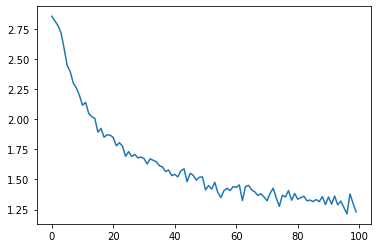

In [21]:
plt.figure()
plt.plot(all_losses)
print("Training Losses")

#### Evaluating the Results

In [22]:
#Function Definition
def evaluate(line_tensor):
    hidden = rnn.initHidden()
    
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)
    
    return output

In [23]:
#Evaluation loop
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

for i in range(n_confusion): #go through examples and record correct
    category, line, category_tensor, line_tensor = randomTrainingExample()
    catsEval[category] += 1
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

for i in range(n_categories): #Normalize rows by their sum
    confusion[i] = confusion[i]/confusion[i].sum()

print("Evaluation finished.")

Evaluation finished.


In [24]:
catsEval

{'Arabic': 524,
 'Chinese': 590,
 'Czech': 556,
 'Dutch': 585,
 'English': 535,
 'French': 560,
 'German': 599,
 'Greek': 514,
 'Irish': 579,
 'Italian': 566,
 'Japanese': 540,
 'Korean': 545,
 'Polish': 570,
 'Portuguese': 529,
 'Russian': 544,
 'Scottish': 572,
 'Spanish': 513,
 'Vietnamese': 579}

C:\Users\ellaw\AppData\Local\Temp/ipykernel_29432/1922943444.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + all_categories, rotation=90)
C:\Users\ellaw\AppData\Local\Temp/ipykernel_29432/1922943444.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + all_categories)


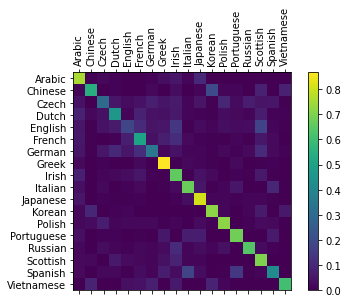

In [25]:
#Plotting Cell
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()

<br>